In [1]:
#Load all necessary Libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 0 appoint a attorney, 1 not appoint on attorney
claimants = pd.read_csv(r"D:\EXCELR DS\claimants.csv") 
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# dropping the case number columns as it is not required 
claimants.drop(["CASENUM"], inplace=True, axis = 1)

In [4]:
# shape of the dataset
claimants.shape

(1340, 6)

In [5]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [7]:
# Removing NA values in dataset
claimants = claimants.dropna()

In [8]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [9]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
#Linear regression and fit the model
classifier = LinearRegression()
classifier.fit(X,Y)
classifier.score (X,Y)

0.06740699602264077

In [10]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
classifier.score (X,Y)

0.708029197080292

In [11]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred_df= pd.DataFrame({'actual': Y, 'predicted_prob': y_pred})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [12]:
# Confusion matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [13]:
print('Accuracy:',(381+395)/(381+395+197+123))

Accuracy: 0.708029197080292


In [14]:
# Classification report
## Precision -What percent of your predictions were correct?
## Recall - What percent of the positive cases did you catch? 
## F1 score - What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [15]:
y_predict_prob = classifier.predict_proba(X)[:,0]
y_predict_prob

array([0.99999695, 0.49283215, 0.42483553, ..., 0.26097058, 0.71404606,
       0.31956906])

# ROC Curve

In [33]:
y_predict_prob = classifier.predict_proba(X)[:,1]
y_predict_prob

array([3.04592568e-06, 5.07167852e-01, 5.75164468e-01, ...,
       7.39029416e-01, 2.85953937e-01, 6.80430941e-01])

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, y_predict_prob)
auc = roc_auc_score(Y, y_pred)
auc

0.7108589063606365

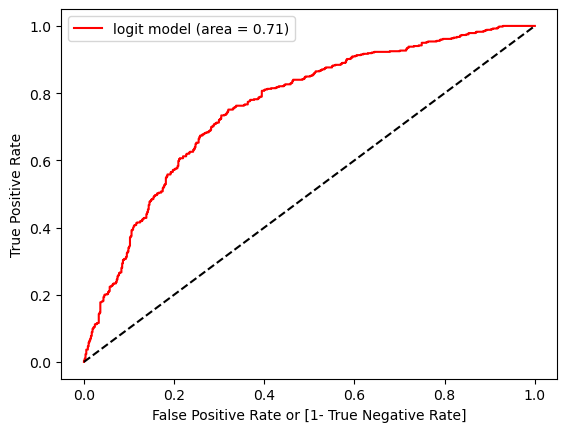

In [37]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [39]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [41]:
model = pickle.load(open(filename, 'rb'))

In [43]:
# CLMSEX-->CLMINSUR-->SEATBELT-->CLMAGE-->LOSS
x = [[1,1,1,50,5000],[0,0,1,45,0]]
y = model.predict(x) 
prob = model.predict_proba(x)
print(y)
print(prob)

[0 0]
[[1.         0.        ]
 [0.61632389 0.38367611]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
# read the dataset
abalone_df = pd.read_csv(r"D:\EXCELR DS\abalone.csv")
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [47]:
# we are ready to partition the dataset
Abalone_sex = abalone_df['Sex'].value_counts()
print(Abalone_sex)

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [49]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [53]:
# Creating a training and test datasets
X = abalone_df.drop(['Sex'], axis=1)
y = abalone_df['Sex']
print(X.columns)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [70]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train)
preds = model1.predict(X_test)
params = model1.get_params()
print(params)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# Intercept And Coefficients:
# The intercept and coefficients are stored in modeli.intercept and modell. 
# coef respectively. Here we need to spend a bit of time, 
# because the output of Sci-Kit Learn is different from what we may expect.

#Print model parameters
print('Intercept: \n', model1.intercept_) 
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-2.18432857  1.94149891  0.24282966]
Coefficients: 
 [[ 0.14341048  0.87164727  0.88362234  1.16692533 -1.00768531  1.95442781
   0.26298134  0.07129119]
 [ 2.25991056  0.90756849 -0.56560353 -2.71659152  0.20856919 -1.94192717
  -0.31980203 -0.13136699]
 [-2.40332104 -1.77921576 -0.31801881  1.54966619  0.79911612 -0.01250064
   0.05682069  0.06007579]]


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Accuracy:
#Assessing the accuracy of the model is not difficult but errors at the different Levels act as a compounding problem
preds = model1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds)
print (confusion_matrix)

[[ 81  46 143]
 [ 13 207  40]
 [ 67  66 173]]


In [76]:
# Create DataFrame from confmtrx array rows for test: Male, Female, Infant designation as index 
# columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confusion_matrix, index=['A_Female', 'A_Infant', 'A_Male'], 
columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])

,predicted_Female,predicted_Infant,predicted_Male
A_Female,81,46,143
A_Infant,13,207,40
A_Male,67,66,173


In [80]:
# Accuracy statistics
# from sklearn import matrics

print('Accuracy Score:', accuracy_score(y_test, preds))
# Create classification report

class_report=classification_report(y_test, preds)
print(class_report)

# The accuracy of this model is poor with only 55% of predictions being correct. 
# The precision and recall of female and male abalone is very concerning as well.

Accuracy Score: 0.5514354066985646
              precision    recall  f1-score   support

           F       0.50      0.30      0.38       270
           I       0.65      0.80      0.72       260
           M       0.49      0.57      0.52       306

    accuracy                           0.55       836
   macro avg       0.55      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836

